<a href="https://colab.research.google.com/github/marconebhering/network-analysis-got/blob/main/Network_Analysis_Game_of_Thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![GoT](http://s2.glbimg.com/lip1rXjb7IfKWKhzwjKCCsKJcrA=/e.glbimg.com/og/ed/f/original/2017/08/17/game-of-thrones.jpg)

## Introdução

Jon Snow, Daenerys Targaryen ou Tyrion Lannister? Quem é o personagem mais importante de Game of Thrones? Vamos ver o que a estatística pode nos dizer sobre isso!

Neste projeto, será analisada a rede de personagens e sua evolução ao longo dos cinco livros da popular série de livros de R.R. Martin, **As Crônicas de Gelo e Fogo** (talvez mais conhecida como a série de TV Game of Thrones). Veremos como a importância dos personagens muda ao longo dos livros usando diferentes medidas de centralidade.

Este projeto usa um conjunto de dados que está disponível [aqui](https://github.com/mathbeveridge/asoiaf). 

## 1. Dataset

In [ ]:
# Importar as bibliotecas
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura dos dados
book1 = pd.read_csv("datasets/book1.csv")
book2 = pd.read_csv("datasets/book2.csv")
book3 = pd.read_csv("datasets/book3.csv")
book4 = pd.read_csv("datasets/book4.csv")
book5 = pd.read_csv("datasets/book5.csv")

# Cabeçalho do Dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


## 2. Network of Thrones 👑

Os DataFrames possuem 5 colunas: `Source`, `Target`, `Type`, `weight` e `book`. `Source` e `Target` são dois nós que estão ligados por uma conexão. 

Uma rede pode ter conexões direcionadas ou não direcionadas, nesta rede específica todas as conexões são não direcionadas. 
O atributo de peso (`weight`) de cada conexão nos informa o número de interações que os personagens tiveram no livro e a coluna `book` nos informa o número do livro.

Uma vez que temos os dados carregados em um DataFrame, é hora de criar uma rede. Para isso, será utilizada a `networkx`, uma biblioteca de análise de rede.

In [ ]:
books = []
books_fnames = ['datasets/book1.csv', 'datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in books_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## 3. O Personagem mais importante de Game of Thrones ⭐

É Jon Snow, Tyrion, Daenerys ou outra pessoa? Veremos! A análise de redes nos oferece muitas métricas diferentes para medir a importância de um nó em uma rede.

É necessário porém, ressaltar que não existe uma maneira "correta" de calcular o nó mais importante de uma rede, cada métrica tem um significado diferente que pode ser utilizada para um contexto específico.

Primeiro, vamos medir a importância de um nó em uma rede oservando o número de vizinhos que ele possui, ou seja, o número de conexões que ele possui. Por exemplo, uma conta influente no Twitter, onde a relação seguidor-seguido forma a rede, seria uma conta que possui um alto número de seguidores.

Essa medida de importância é chamada de degree, ou grau.

Usando essa medida, vamos extrair os 10 personagens mais importantes do primeiro e do quinto livro.

In [ ]:
# Calculando o degree do livro 1
deg_book1 = nx.degree_centrality(books[0])

# Calculando o degree do livro 5 
deg_book5 = nx.degree_centrality(books[4])

# Ordenando de acordo com o degree e armazenando os 10 maiores
sorted_deg_book1 = sorted(deg_book1.items(), key=lambda x: x[1], reverse=True)[:10]

# Ordenando de acordo com o degree e armazenando os 10 maiores
sorted_deg_book5 = sorted(deg_book5.items(), key=lambda x: x[1], reverse=True)[:10]

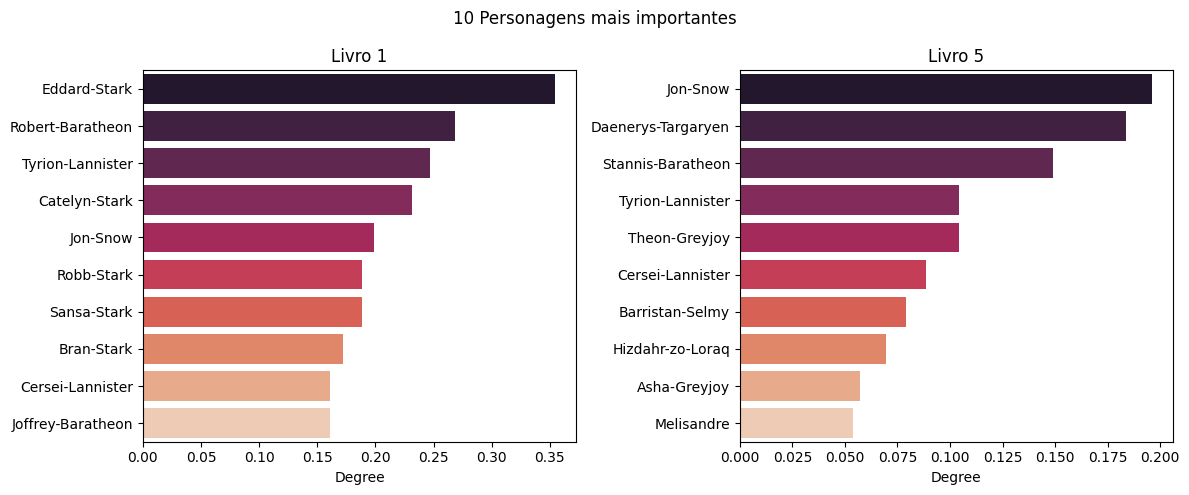

In [ ]:
# Plotando gráfico com os personagens mais importantes
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
sns.barplot(x = [x[1] for x in sorted_deg_book1], y = [x[0] for x in sorted_deg_book1], ax = ax[0], palette = 'rocket')
sns.barplot(x = [x[1] for x in sorted_deg_book5], y = [x[0] for x in sorted_deg_book5], ax = ax[1], palette = 'rocket')
fig.suptitle('10 Personagens mais importantes')
ax[0].set_title('Livro 1')
ax[0].set_xlabel('Degree')
ax[1].set_title('Livro 5')
ax[1].set_xlabel('Degree');

## 4. A evolução da importância dos personagens 📈

De acordo com o grau (`degree`), o personagem mais importante do primeiro livro é Eddard Stark, mas ele não figura entre o Top 10 do quinto livro. A importância dos personagens muda ao longo dos cinco livros porque, você sabe, coisas acontecem... 👀👀

Vamos olhar então a evolução do grau de alguns personagens como Eddard Stark, Jon Snow e Tyrion, que apareceram no Top 10 do primeiro livro em `degree`.

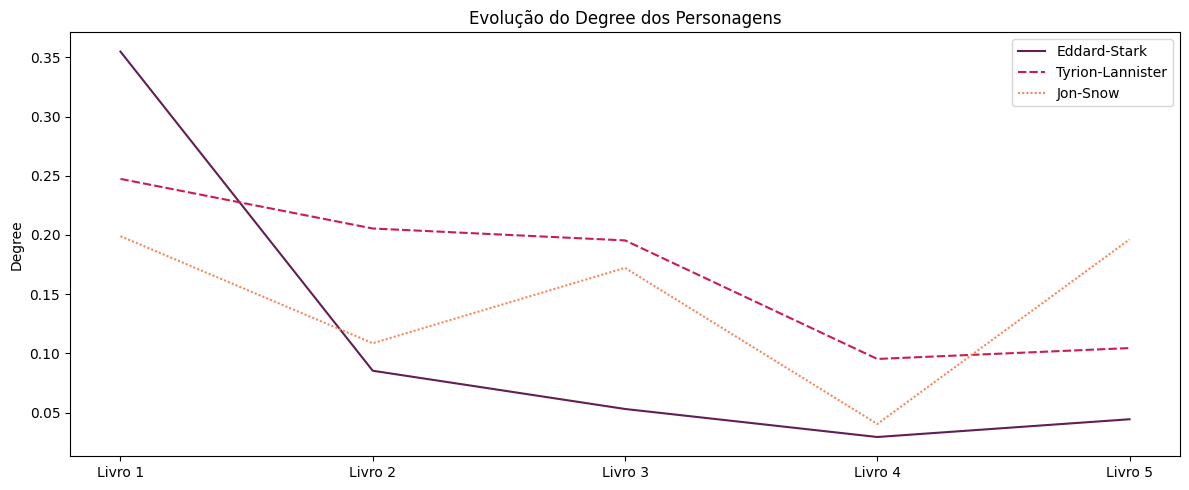

In [ ]:
# Criando uma lista do grau em todos os livros
evol = [nx.degree_centrality(book) for book in books]
 
# Criando um DataFrame da lista
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotando a evolução da importância de Eddard-Stark, Tyrion-Lannister and Jon-Snow
sns.lineplot(data = degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']], palette = 'rocket').set(title = 'Evolução do Degree dos Personagens')
plt.ylabel('Degree')
plt.xticks([0, 1, 2, 3, 4], ['Livro 1', 'Livro 2', 'Livro 3', 'Livro 4', 'Livro 5']);

## 5. O que acontece com Stannis Baratheon?

Podemos ver que a importância de Eddard Stark diminui à medida que a série de livros avança. Com Jon Snow já uma queda no 4º livro, mas um aumento repentino no 5º.

Mas a partir de agora, vamos analisar várias outras medidas, como o `betweenness` e o `PageRank`, para encontrar personagens importantes na rede e identificar se podemos descobrir mais alguns fatos interessantes sobre a rede.

Vamos então traçar a evolução do `betweenness` dos 4 personagens principais.

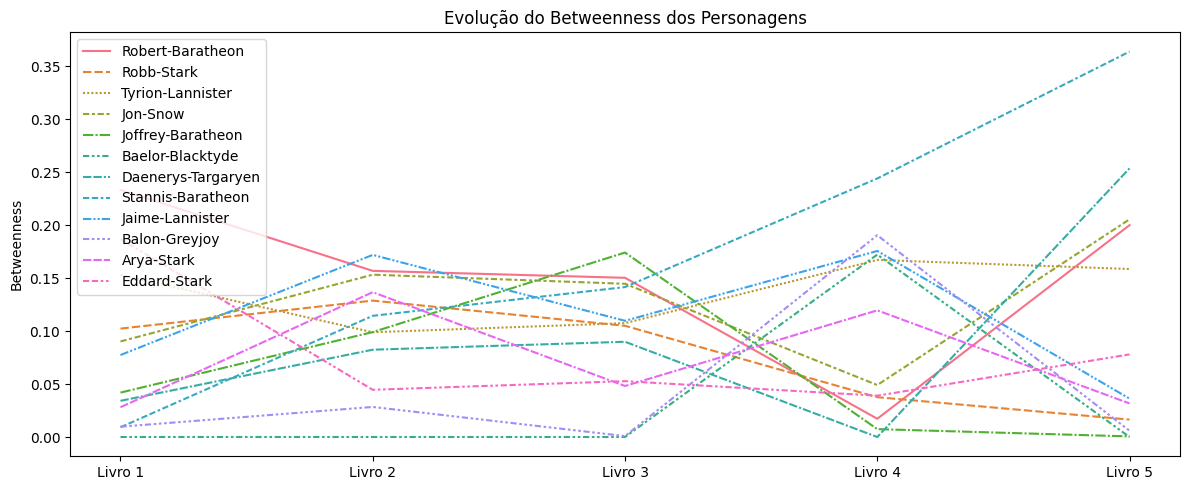

In [ ]:
# Criando uma lista de betweenness de todos os livros
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Criando um DataFrame a partir da lista
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Encontrando o Top4 em cada livro
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Traçando a evolução dos personagens principais
sns.lineplot(data = betweenness_evol_df[list_of_char]).set(title = 'Evolução do Betweenness dos Personagens')
plt.ylabel('Betweenness')
plt.xticks([0, 1, 2, 3, 4], ['Livro 1', 'Livro 2', 'Livro 3', 'Livro 4', 'Livro 5']);

## 6. O que o Google PageRank nos diz sobre GoT?

Vemos um curioso aumento na importância de Stannis Baratheon através dos livros. No 5º livro, ele é significativamente mais importante do que outros personagens na rede, embora seja o 3º personagem mais importante de acordo com o grau (`degree`).

PageRank foi a maneira que o Google inicialmente ranqueava páginas da web. Ele avalia links internos e externos de páginas da web, que é, essencialmente, uma rede direcionada. Vamos ver a importância dos personagens na rede de Game of Thrones de acordo com o PageRank.

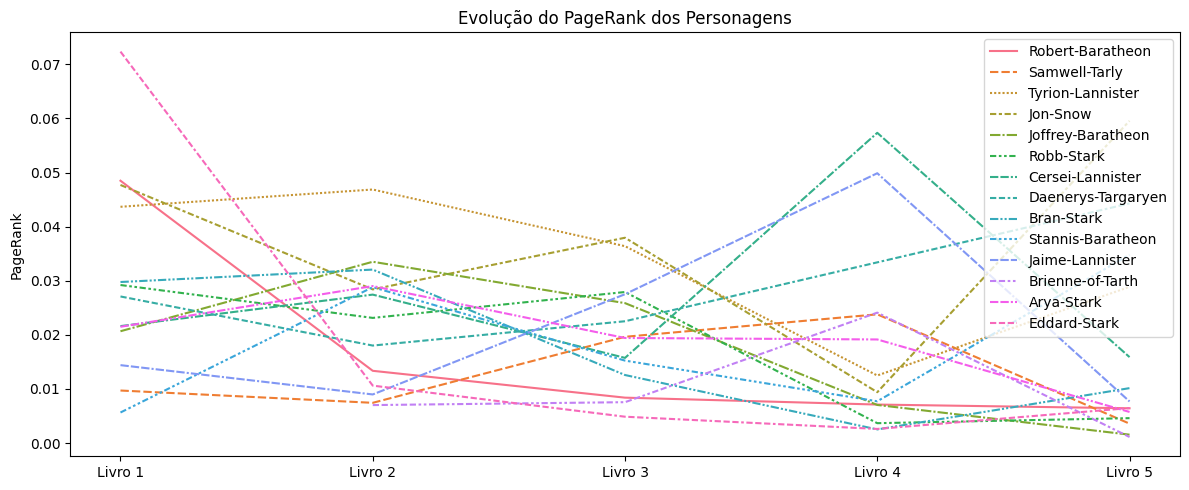

In [ ]:
# Criando uma lista de pagerank de todos personagens em todos os livros
evol = [nx.pagerank(book) for book in books]

# Criando um DataFrame a partir da lista 
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Encontrando os 4 personagens principais em cada livro
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending = False)[0:4].index))
list_of_char = list(set_of_char)

# Plotando os personagens principais
sns.lineplot(data = pagerank_evol_df[list_of_char]).set(title = 'Evolução do PageRank dos Personagens')
plt.ylabel('PageRank')
plt.xticks([0, 1, 2, 3, 4], ['Livro 1', 'Livro 2', 'Livro 3', 'Livro 4', 'Livro 5']);

## 7. Correlação entre diferentes medidas

Stannis, Jon Snow e Daenerys são os personagens mais importantes no 5º livro de acordo com o PageRank. Eddard Staks segue uma curva similar, mas para o `degree` e o `betweenness`: Ele é importante no 5º livro, mas cai no esquecimento ao longo da série.

Vimos 3 medidas diferentes para calcular a importância de um nó em uma rede, e todos eles nos contam algo sobre os personagens e sua importância na rede. Vemos alguns nomes figurarem no entre os principais nas 3 medidas, então será que há uma forte correlação entre elas?

Vamos ver a correlação entre `PageRank`, `betweenness` e `degree` para o 5º livro usando a correlação de Pearson.

In [ ]:
# Criando uma lista para as 3 medidas de todos os personagens do 5º livro
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Criando um DataFrame com as correlações
cor = pd.DataFrame.from_records(measures)

# Calculando a correlação
correl = cor.T.corr()
correl.rename(columns = {0: 'pagerank', 1: 'betweenness', 2: 'degree'}, index = {0: 'pagerank', 1: 'betweenness', 2: 'degree'}, inplace = True)
correl

,pagerank,betweenness,degree
pagerank,1.000000,0.793372,0.971493
betweenness,0.793372,1.000000,0.833816
degree,0.971493,0.833816,1.000000


## 8. Conclusão

Temos uma alta correlação entre as 3 medidas para nossos personagens na rede.

Dessa forma, estamos procurando diferentes maneiras de encontrar os personagens mais importantes de Game of Thrones na rede. De acordo com o `degree`, que mede o número de conexões, Eddard Stark é o personagem mais importante inicialmente nos livros. Mas quem é/são o(s) personagem(ns) mais importante(s) no 5º livro de acordo com as 3 medidas?

In [ ]:
top = cor.T
p_rank, b_cent, d_cent = top.idxmax(axis=0)
print('Personagem com maior Page Rank:', p_rank)
print('Personagem com maior Betweenness:', b_cent)
print('Personagem com maior Degree:', d_cent)

Personagem com maior Page Rank: Jon-Snow
Personagem com maior Betweenness: Stannis-Baratheon
Personagem com maior Degree: Jon-Snow


De acordo com 3 medidas, Jon Snow foi o principal personagem do 5º Livro.